<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Logistic_Regression_in_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression in TensorFlow 2.0 (MNIST Data set)

Author: https://theclickreader.com/courses/tensorflow-2-for-deep-learning/lessons/logistic-regression-with-tensorflow/

Modify by: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Read Data set

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Converting data to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.


## Create Model

In [94]:
from tensorflow.keras import Model

class MyModel:
    def __init__(self):
        super(MyModel,self).__init__()
        self.W = tf.Variable(tf.ones([28*28, 10]), trainable=True, name="weight")
        self.b = tf.Variable(tf.zeros([10]), trainable=True, name="bias")
    def __call__(self, x):
        return tf.nn.softmax(tf.matmul(x, self.W) + self.b)
    
   
def loss(y_pred, y_true):
    # Encode label to a one hot vector
    y_true = tf.one_hot(y_true, depth=10)
    
    # Clip prediction values to avoid log(0) error
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    
    # Compute cross-entropy
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# SGD optimizer 
#optimizer = tf.optimizers.SGD(lr = 0.1)
# Adam optimizer 
optimizer = tf.optimizers.Adam(lr = 0.1)
    
def train(model, x, y):
    with tf.GradientTape() as t:
        pred = model(x)
        current_loss = loss(pred, y)
        print('Current Loss: ', current_loss.numpy())
    # Compute gradients
    gradients = t.gradient(current_loss, [model.W, model.b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

Train Model (Without batch)

Current Loss:  2.302598
Current Loss:  3.246666
Current Loss:  4.068366
Current Loss:  4.820486
Current Loss:  3.804582
Current Loss:  3.972225
Current Loss:  3.2832603
Current Loss:  3.386886
Current Loss:  3.617123
Current Loss:  3.5143042
Current Loss:  3.3665757
Current Loss:  3.344451
Current Loss:  3.3511677
Current Loss:  3.2893898
Current Loss:  3.201437
Current Loss:  3.1488354
Current Loss:  3.1312923
Current Loss:  3.1364942
Current Loss:  3.1435747
Current Loss:  3.1315017
Current Loss:  3.0975938
Current Loss:  3.0580912
Current Loss:  3.0293512
Current Loss:  3.008567
Current Loss:  2.9807594
Current Loss:  2.9261951
Current Loss:  2.8414364
Current Loss:  2.7554457
Current Loss:  2.6802115
Current Loss:  2.6047182
Current Loss:  2.4957256
Current Loss:  2.3455386
Current Loss:  2.1804166
Current Loss:  2.0279741
Current Loss:  1.8974724
Current Loss:  1.7761495
Current Loss:  1.66648
Current Loss:  1.5942031
Current Loss:  1.5604581
Current Loss:  1.5416698
Current Loss:

Text(0, 0.5, 'Acc')

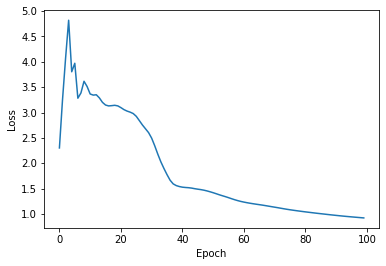

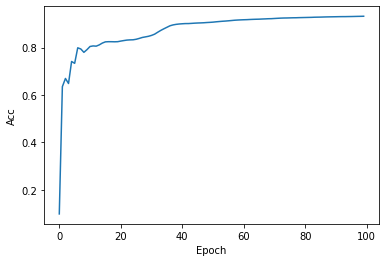

In [104]:
# Initialize the model
model = MyModel()
epochs = 100
losses = []
acces = []

for epoch_count in range(epochs):
    current_loss = loss(model(x_train), y_train)
    losses.append(current_loss)
    
    current_acc = accuracy(model(x_train), y_train)
    acces.append(current_acc)
    # Train the model
    train(model, x_train, y_train)
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses) 
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.figure()
plt.plot(acces)    
plt.xlabel('Epoch')
plt.ylabel('Acc')

## Train Model (With batch)

Current Loss:  2.3025947
Current Loss:  4.3801293
Current Loss:  6.511172
Current Loss:  6.082168
Current Loss:  5.6302605
Current Loss:  5.6834674
Current Loss:  5.7038093
Current Loss:  5.4803996
Current Loss:  5.2568283
Current Loss:  5.233235
>>>>>>> Epoch 0 Loss: 5.238376617431641
Current Loss:  5.279932
Current Loss:  5.3691974
Current Loss:  5.2120647
Current Loss:  5.344782
Current Loss:  5.2961307
Current Loss:  5.2880335
Current Loss:  4.9739933
Current Loss:  5.0073743
Current Loss:  4.7530627
Current Loss:  4.991821
>>>>>>> Epoch 1 Loss: 4.998739242553711
Current Loss:  5.2405815
Current Loss:  4.8189683
Current Loss:  4.5831485
Current Loss:  4.7610474
Current Loss:  4.7055573
Current Loss:  4.652554
Current Loss:  4.2997437
Current Loss:  3.9393888
Current Loss:  3.9946094
Current Loss:  3.7766218
>>>>>>> Epoch 2 Loss: 4.033910751342773
Current Loss:  4.121434
Current Loss:  4.1204615
Current Loss:  3.9492466
Current Loss:  3.8884444
Current Loss:  3.755765
Current Loss: 

Text(0, 0.5, 'Acc')

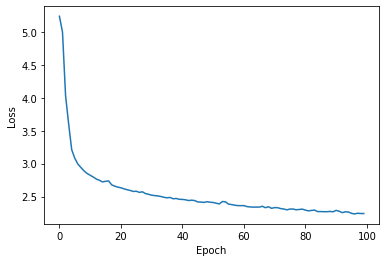

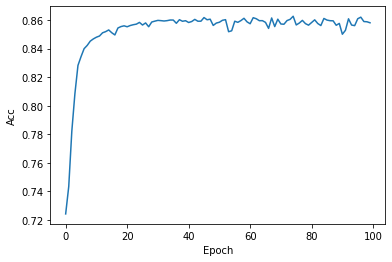

In [101]:
# Initialize the model
model = MyModel()
epochs = 100
batch = 6000
losses = []
acces = []

y_train_temp = np.reshape(y_train, [np.shape(y_train)[0], 1])
xy_train = np.concatenate((x_train, y_train_temp), axis=1)

for epoch_count in range(epochs):
    np.random.shuffle(xy_train)
    X = xy_train[:, 0:(xy_train.shape[1]-1)]
    y = xy_train[:, (xy_train.shape[1]-1)]

    for i in range(int((xy_train.shape[0]/batch))):
      X_batch = X[i*batch:(i+1)*batch, :]
      y_batch = y[i*batch:(i+1)*batch]

      # Train the model
      train(model, X_batch, y_batch)

    current_loss = loss(model(X), y)
    current_acc = accuracy(model(X), y)

    losses.append(current_loss)
    acces.append(current_acc)

    print('>>>>>>> Epoch {} Loss: {}'.format(epoch_count, current_loss.numpy()))
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses) 
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.figure()
plt.plot(acces)    
plt.xlabel('Epoch')
plt.ylabel('Acc')   